<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/Clasificac%C3%ADon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Presentacion del data set:

El conjunto de datos  pertenece a sintomas que estan relacionados con la enfermedad de la diabetes. Contiene los siguientes tipos de variables:

Variables numéricas: 1 y variables categoricas: 16



In [175]:
# Importamos el dataset
data=pd.read_csv('/content/diabetes_data_upload.csv')

In [176]:
# Mostramos las primeras filas del data set
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [177]:
# Obtener los tipos de variables en el dataset
data_types = data.dtypes
data_types


,0
Age,int64
Gender,object
Polyuria,object
Polydipsia,object
sudden weight loss,object
weakness,object
Polyphagia,object
Genital thrush,object
visual blurring,object
Itching,object


# Pre-procesamiento del dataset

Se verificaran valores nulos, codificación de variables categóricas, separación de datos en variables de entrada/salida, y normalización.




In [178]:
# Verificar si hay valores nulos en el dataset
null_values = data.isnull().sum()
null_values[null_values > 0]

,0


In [179]:
# Codificamos las variables categóricas (o y 1)
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = label_encoder.fit_transform(data[column])

In [180]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [181]:
# Separamos la variable objetivo
X = data.drop('class', axis=1)
y = data['class']


In [182]:
# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Estandarizamos las características (opcional pero común para algunos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mostramos los datos procesados
X_train[:5], y_train[:5]


(array([[ 0.3866783 ,  0.73923501,  1.02927447,  1.1506617 ,  1.24585201,
          0.84376191,  1.10125654, -0.52915026,  1.06458129, -0.99520381,
          1.72101852, -0.9258201 ,  1.17932379, -0.77857409,  1.31789306,
         -0.43424812],
        [-0.59566168,  0.73923501,  1.02927447,  1.1506617 ,  1.24585201,
          0.84376191,  1.10125654,  1.88982237,  1.06458129,  1.00481931,
          1.72101852, -0.9258201 , -0.84794355, -0.77857409, -0.75878691,
          2.30283093],
        [ 0.46853996,  0.73923501, -0.97155815, -0.86906517,  1.24585201,
          0.84376191, -0.90805363,  1.88982237, -0.93933644, -0.99520381,
         -0.58105127,  1.08012345, -0.84794355, -0.77857409,  1.31789306,
         -0.43424812],
        [ 0.1410933 , -1.35274978, -0.97155815, -0.86906517, -0.80266355,
          0.84376191, -0.90805363, -0.52915026,  1.06458129,  1.00481931,
         -0.58105127,  1.08012345, -0.84794355, -0.77857409,  1.31789306,
         -0.43424812],
        [-0.84124668

Todas las columnas categóricas fueron convertidas a valores numéricos.
Los datos se dividieron en conjuntos de entrenamiento y prueba, con un 80% de datos para entrenamiento y un 20% para prueba.
Estandarización: Las características numéricas fueron estandarizadas para que tengan media cero y desviación estándar uno, lo cual es mejor para los modelos de aprendizaje automático.

# Explicación del objetivo
El objetivo de este modelo es clasificar si una persona tiene o no diabetes en función de una serie de síntomas y características personales. Este es un problema de clasificación binaria, donde la variable de salida es la columna class, que tiene dos clases posibles:

Positive (1): Indica que la persona tiene diabetes.
Negative (0): Indica que la persona no tiene diabetes.
Cada registro representa la información de un paciente.

Dado que la clasificación es binaria, el modelo tratará de predecir si un nuevo conjunto de datos de síntomas corresponde a un caso positivo o negativo de diabetes, basándose en patrones aprendidos del conjunto de datos de entrenamiento.

# Elección de modelos de clasificación a entrenar.
Regresión Logística

Árbol de Decisión con ajuste de hiperparámetros

In [184]:
# Entrenamiento del modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

Creamos un diccionario param_grid (cuadrícula de hiperparámetros).

Las claves representan los nombres de los hiperparámetros que se van a ajustar en el modelo.
Los valores son listas que se probarán para cada hiperparámetro.

max_depth controla la profundidad máxima del árbol.

min_samples_split define el número mínimo de muestras requeridas para dividir un nodo interno del árbol.

min_samples_leaf especifica el número mínimo de muestras que debe tener un nodo hoja del árbol.
1, 2, 4: Se probarán estos valores como el mínimo de muestras en una hoja.


In [185]:
# Entrenamiento del modelo de Árbol de Decisión con ajuste de hiperparámetros.
param_grid = {
  "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]}
# Definiendo los hiperparámetros a ajustar
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]}

In [186]:
# Búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [187]:
# Mejor modelo encontrado
best_tree = grid_search.best_estimator_
tree_pred = best_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)

In [188]:
# Resultados de precisión para ambos modelos
log_reg_accuracy, tree_accuracy, grid_search.best_params_


(0.9230769230769231,
 0.9519230769230769,
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2})

Los modelos se entrenaron con los siguientes resultados:

Regresión Logística: Este modelo logró una precisión del 92.3% en el conjunto de prueba. La regresión logística es un modelo lineal que asigna probabilidades a las clases y es útil en problemas de clasificación binaria como este.

Árbol de Decisión: Este modelo alcanzó una precisión del 95.2% en el conjunto de prueba, lo que lo hace efectivo en problemas con múltiples características categóricas.

Para mejorar el rendimiento del árbol de decisión, se realizó una búsqueda de hiperparámetros utilizando GridSearchCV, probando diferentes valores.

# Resultados obtenidos y su análisis  

In [189]:
from sklearn.metrics import classification_report, confusion_matrix

# Métricas y matrices de confusión para ambos modelos

# Regresión Logística
log_reg_report = classification_report(y_test, log_reg_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)

# Árbol de Decisión
tree_report = classification_report(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

log_reg_report, log_reg_cm, tree_report, tree_cm


('              precision    recall  f1-score   support\n\n           0       0.90      0.85      0.88        33\n           1       0.93      0.96      0.94        71\n\n    accuracy                           0.92       104\n   macro avg       0.92      0.90      0.91       104\nweighted avg       0.92      0.92      0.92       104\n',
 array([[28,  5],
        [ 3, 68]]),
 '              precision    recall  f1-score   support\n\n           0       0.87      1.00      0.93        33\n           1       1.00      0.93      0.96        71\n\n    accuracy                           0.95       104\n   macro avg       0.93      0.96      0.95       104\nweighted avg       0.96      0.95      0.95       104\n',
 array([[33,  0],
        [ 5, 66]]))

In [190]:
# Comparación de métricas de clasificación
print("Métricas de clasificación - Regresión Logística")
print(log_reg_report)
print("\nMatriz de Confusión - Regresión Logística")
print(log_reg_cm)

print("\n" + "="*50 + "\n")

print("Métricas de clasificación - Árbol de Decisión")
print(tree_report)
print("\nMatriz de Confusión - Árbol de Decisión")
print(tree_cm)


Métricas de clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Matriz de Confusión - Regresión Logística
[[28  5]
 [ 3 68]]


Métricas de clasificación - Árbol de Decisión
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104


Matriz de Confusión - Árbol de Decisión
[[33  0]
 [ 5 66]]


Regresión Logística: Presenta un buen rendimiento general con una precisión ligeramente inferior, mostrando un equilibrio entre precisión y recall en ambas clases.
Árbol de Decisión: Con el ajuste de hiperparámetros, muestra una precisión mayor.
Ambos modelos muestran un rendimiento sólido, aunque el Árbol de Decisión se destaca en la clasificación correcta de ambos tipos de casos, especialmente tras el ajuste de hiperparámetros.

Elección de Modelos y Resultados
Regresión Logística:

Ventajas: Este modelo es simple y eficaz para problemas de clasificación binaria
Árbol de Decisión:

Ventajas: Los árboles de decisión son efectivos para capturar patrones no lineales y manejar relaciones complejas en los datos.



Curvas De Precisión-Recall Para Ambos Modelos

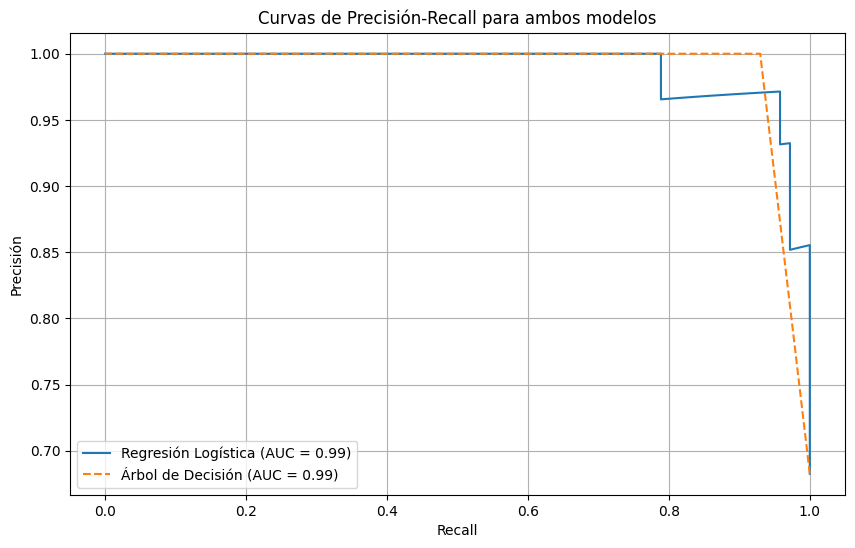

In [191]:
from sklearn.metrics import precision_recall_curve, auc

# Probabilidades de predicción para cada modelo
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilidad para clase positiva
tree_probs = best_tree.predict_proba(X_test)[:, 1]   # Probabilidad para clase positiva

# Curvas de precisión-recall
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, log_reg_probs)
tree_precision, tree_recall, _ = precision_recall_curve(y_test, tree_probs)

# Cálculo del área bajo la curva (AUC) para cada modelo
log_reg_auc = auc(log_reg_recall, log_reg_precision)
tree_auc = auc(tree_recall, tree_precision)

# Gráficos de las curvas de precisión-recall
plt.figure(figsize=(10, 6))

plt.plot(log_reg_recall, log_reg_precision, label=f"Regresión Logística (AUC = {log_reg_auc:.2f})")
plt.plot(tree_recall, tree_precision, label=f"Árbol de Decisión (AUC = {tree_auc:.2f})", linestyle='--')

# Personalización del gráfico
plt.title("Curvas de Precisión-Recall para ambos modelos")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid(True)
plt.show()


La Regresión Logística tiene un área bajo la curva significativa, mostrando un buen balance entre precisión y recall, aunque ligeramente inferior en comparación con el árbol de decisión.
El Árbol de Decisión, con una mayor área bajo la curva, muestra una ventaja en su capacidad para mantener alta la precisión a medida que aumenta el recall, lo que indica un mejor rendimiento en la detección de casos positivos de diabetes sin comprometer la precisión.
Estas curvas destacan la ventaja del árbol de decisión en este caso, consolidando su posición como modelo candidato. ​